## BAM VS. AIRQO

### Stationary monitors

1.     Hourly comparison

2.     Daily  comparison

### Importing relevant packages

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import re
import os
import datetime
from sklearn.linear_model import LinearRegression  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy.stats import pearsonr
import joblib
import seaborn as sns 
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
import uncertainties as unc

### Changing default colormap - matplotlib

In [182]:
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

### display data frame info

In [183]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

### Reading data

In [184]:
muk_lowcost_data = pd.read_csv('AQ_88.csv') #channel 88-thingspeak,  device colocated with MUK BAM
us_embassy_lowcost_data = pd.read_csv('AQ_51.csv') # #channel 51-thingspeak, device collocated with the US embassy BAM
muk_bam_data = pd.read_csv('MUK-BAM.csv')#MUK BAM
us_embassy_bam_data = pd.read_csv('Kampala_PM2.5_2017_2018_2019_2020.csv')#US Embassy BAM
muk_lowcost_data.head(10)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
0,2020-07-15 13:39:56 EAT,1,45.62,56.75,42.68,53.22,0.333437,32.568516,3.75,"0.333437,32.568516,1237.30,0.04,12.00,84.00,42...",NaN,NaN,NaN,NaN
1,2020-07-15 13:45:30 EAT,2,42.47,51.85,42.57,50.53,0.333481,32.568504,3.73,"0.333481,32.568504,1240.80,0.10,12.00,76.00,44...",NaN,NaN,NaN,NaN
2,2020-07-15 13:58:27 EAT,3,46.17,56.85,45.20,56.03,0.333502,32.568539,4.02,"0.333502,32.568539,1250.00,0.04,12.00,79.00,43...",NaN,NaN,NaN,NaN
3,2020-07-15 14:09:22 EAT,4,39.53,48.02,38.33,47.13,0.333471,32.568542,4.05,"0.333471,32.568542,1242.00,0.03,12.00,85.00,42...",NaN,NaN,NaN,NaN
4,2020-07-15 14:13:29 EAT,5,36.15,43.60,32.72,37.70,0.333491,32.568550,4.06,"0.333491,32.568550,1240.40,0.05,12.00,81.00,43...",NaN,NaN,NaN,NaN
5,2020-07-15 14:46:39 EAT,6,36.33,42.32,33.85,37.92,0.333486,32.568527,4.11,"0.333486,32.568527,1240.60,0.01,11.00,86.00,43...",NaN,NaN,NaN,NaN
6,2020-07-15 14:50:49 EAT,7,32.57,35.88,33.82,39.67,0.333527,32.568550,4.11,"0.333527,32.568550,1237.00,0.01,12.00,86.00,47...",NaN,NaN,NaN,NaN
7,2020-07-15 15:07:28 EAT,8,38.45,46.17,36.65,43.82,0.333511,32.568550,4.12,"0.333511,32.568550,1237.40,0.03,12.00,75.00,45...",NaN,NaN,NaN,NaN
8,2020-07-15 15:11:36 EAT,9,39.00,46.93,37.63,45.48,0.333507,32.568562,4.12,"0.333507,32.568562,1237.50,0.06,12.00,73.00,44...",NaN,NaN,NaN,NaN
9,2020-07-15 15:15:47 EAT,10,40.18,48.05,38.15,46.88,0.333521,32.568523,4.13,"0.333521,32.568523,1229.90,0.01,12.00,81.00,44...",NaN,NaN,NaN,NaN


### Renaming columns

In [185]:
muk_lowcost_data.rename(columns={'field1':'Sensor1 PM2.5_CF_1_ug/m3','field2':'Sensor1 PM10_CF_1_ug/m3',
                                     'field3':'Sensor2PM2.5_CF_1_ug/m3', 'field4':'Sensor2 PM10_CF_1_ug/m3',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 
                                     'field8':'GpsData'},inplace=True)
muk_lowcost_data = muk_lowcost_data.drop(['entry_id','Latitude', 'Longitude', 'Battery Voltage','GpsData','latitude','longitude', 'elevation','status'], axis=1)
muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] = muk_lowcost_data[['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3']].mean(axis=1).round(2)
muk_lowcost_data['Average_PM10_CF_1_ug/m3'] = muk_lowcost_data[['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3']].mean(axis=1).round(2)

muk_lowcost_data.tail()


,created_at,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
13990,2020-09-04 05:16:10 EAT,52.47,65.90,50.08,64.03,51.28,64.96
13991,2020-09-04 05:26:25 EAT,50.57,64.15,49.88,64.77,50.22,64.46
13992,2020-09-04 05:30:37 EAT,53.05,66.45,48.08,61.80,50.56,64.12
13993,2020-09-04 05:34:49 EAT,49.98,64.27,49.20,64.33,49.59,64.30
13994,2020-09-04 05:41:10 EAT,49.07,61.70,46.48,59.88,47.78,60.79


In [186]:
us_embassy_lowcost_data.rename(columns={'field1':'Sensor1 PM2.5_CF_1_ug/m3','field2':'Sensor1 PM10_CF_1_ug/m3',
                                     'field3':'Sensor2PM2.5_CF_1_ug/m3', 'field4':'Sensor2 PM10_CF_1_ug/m3',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 
                                     'field8':'GpsData'},inplace=True)
us_embassy_lowcost_data = us_embassy_lowcost_data.drop(['entry_id','Latitude', 'Longitude', 'Battery Voltage','GpsData','latitude','longitude', 'elevation','status'], axis=1)
us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] = us_embassy_lowcost_data[['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3']].mean(axis=1).round(2)
us_embassy_lowcost_data['Average_PM10_CF_1_ug/m3'] = us_embassy_lowcost_data[['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3']].mean(axis=1).round(2)

us_embassy_lowcost_data.tail()


,created_at,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
281103,2020-06-23 20:54:23 UTC,46.38,56.70,48.67,61.43,47.53,59.06
281104,2020-06-23 20:55:52 UTC,48.30,58.53,49.32,63.95,48.81,61.24
281105,2020-06-23 20:57:16 UTC,49.03,61.17,48.68,62.78,48.86,61.98
281106,2020-06-23 20:58:38 UTC,50.23,62.50,49.92,63.73,50.08,63.11
281107,2020-06-23 21:00:01 UTC,51.17,63.00,49.73,64.28,50.45,63.64


### Data exploration

In [187]:
show_dataframe_info(muk_lowcost_data)

(13995, 7)
['created_at', 'Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 7 columns):
created_at                  13995 non-null object
Sensor1 PM2.5_CF_1_ug/m3    13995 non-null float64
Sensor1 PM10_CF_1_ug/m3     13995 non-null float64
Sensor2PM2.5_CF_1_ug/m3     13995 non-null float64
Sensor2 PM10_CF_1_ug/m3     13995 non-null float64
Average_PM2.5_CF_1_ug/m3    13995 non-null float64
Average_PM10_CF_1_ug/m3     13995 non-null float64
dtypes: float64(6), object(1)
memory usage: 765.4+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at                   object
Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_CF_1_ug/m3     float64
Sensor2PM2.5_CF_1_ug/m3     float64
Sensor2 PM10_CF_1_ug/m3     float64
Average_PM2.5_CF_1_ug/m3    float64
Average_PM10_CF_1_ug

In [188]:
show_dataframe_info(us_embassy_lowcost_data)

(281108, 7)
['created_at', 'Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281108 entries, 0 to 281107
Data columns (total 7 columns):
created_at                  281108 non-null object
Sensor1 PM2.5_CF_1_ug/m3    281108 non-null float64
Sensor1 PM10_CF_1_ug/m3     281108 non-null float64
Sensor2PM2.5_CF_1_ug/m3     281108 non-null float64
Sensor2 PM10_CF_1_ug/m3     281108 non-null float64
Average_PM2.5_CF_1_ug/m3    281108 non-null float64
Average_PM10_CF_1_ug/m3     281108 non-null float64
dtypes: float64(6), object(1)
memory usage: 15.0+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at                   object
Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_CF_1_ug/m3     float64
Sensor2PM2.5_CF_1_ug/m3     float64
Sensor2 PM10_CF_1_ug/m3     float64
Average_PM2.5_CF_1_ug/m3    float64
Average_PM1

In [189]:
show_dataframe_info(muk_bam_data)

(1261, 13)
['Time', 'ConcRT(ug/m3)', 'ConcHR(ug/m3)', 'ConcS(ug/m3)', 'Flow(lpm)', 'WS(m/s)', 'WD(Deg)', 'AT(C)', 'RH(%)', 'BP(mmHg)', 'FT(C)', 'FRH(%)', 'Status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 13 columns):
Time             1261 non-null object
ConcRT(ug/m3)    1261 non-null float64
ConcHR(ug/m3)    1261 non-null float64
ConcS(ug/m3)     1261 non-null float64
Flow(lpm)        1261 non-null float64
WS(m/s)          1261 non-null int64
WD(Deg)          1261 non-null int64
AT(C)            1261 non-null float64
RH(%)            1261 non-null int64
BP(mmHg)         1261 non-null float64
FT(C)            1261 non-null float64
FRH(%)           1261 non-null int64
Status           1261 non-null int64
dtypes: float64(7), int64(5), object(1)
memory usage: 128.1+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 Time              object
ConcRT(ug/m3)    float64
ConcHR(ug/m3)    float64
ConcS(ug/m3)     float64
Flow(lpm)    

In [190]:
show_dataframe_info(us_embassy_bam_data)

(29969, 14)
['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit', 'Duration', 'QC Name']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29969 entries, 0 to 29968
Data columns (total 14 columns):
Site             29969 non-null object
Parameter        29969 non-null object
Date (LT)        29969 non-null object
Year             29969 non-null int64
Month            29969 non-null int64
Day              29969 non-null int64
Hour             29969 non-null int64
NowCast Conc.    29969 non-null float64
AQI              29969 non-null int64
AQI Category     28287 non-null object
Raw Conc.        29969 non-null float64
Conc. Unit       29969 non-null object
Duration         29969 non-null object
QC Name          29969 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 3.2+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 Site              object
Parameter         object
Date (LT)  

# Makerere low cost device

### Setting timestamp as index 

In [191]:
muk_lowcost_data["TimeStamp"] = pd.to_datetime(muk_lowcost_data["created_at"])
muk_lowcost_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
muk_lowcost_data = muk_lowcost_data.set_index('TimeStamp')
muk_lowcost_data = muk_lowcost_data.drop(['created_at'], axis=1)
muk_lowcost_data.head()

C:\Users\User\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning: tzname EAT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2020-07-15 13:39:56,45.62,56.75,42.68,53.22,44.15,54.98
2020-07-15 13:45:30,42.47,51.85,42.57,50.53,42.52,51.19
2020-07-15 13:58:27,46.17,56.85,45.20,56.03,45.68,56.44
2020-07-15 14:09:22,39.53,48.02,38.33,47.13,38.93,47.58
2020-07-15 14:13:29,36.15,43.60,32.72,37.70,34.44,40.65


###  Filter out outliers, get values between 0 and  500.4 

In [192]:
muk_lowcost_data = muk_lowcost_data[muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] <= 500.4]
muk_lowcost_data = muk_lowcost_data[muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] > 0]

In [193]:
muk_lowcost_data = muk_lowcost_data.loc['2020-07-16 00:00:00':'2020-07-30 23:59:59']

In [194]:
muk_lowcost_data.shape

(4287, 6)

### Get hourly concetration values

In [195]:
muk_lowcost_hourly_std  = muk_lowcost_data.resample('H').std().round(2)
muk_lowcost_hourly_mean = muk_lowcost_data.resample('H').mean().round(2)

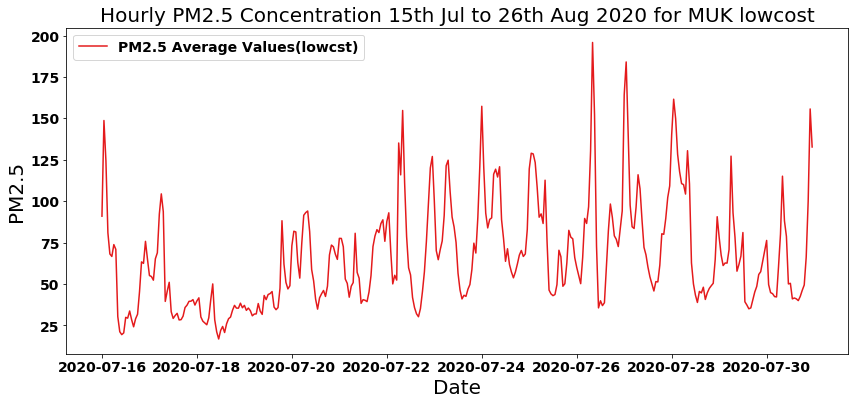

<Figure size 432x288 with 0 Axes>

In [196]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(muk_lowcost_hourly_mean.index, 
         muk_lowcost_hourly_mean['Average_PM2.5_CF_1_ug/m3'], linestyle='solid', label='PM2.5 Average Values(lowcst)') #marker='o', 

chart_title =  'Hourly PM2.5 Concentration 15th Jul to 26th Aug 2020 for MUK lowcost'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('hourly_Muk_lowcost.png')

### Get daily concetration values

In [197]:
muk_lowcost_daily_std    = muk_lowcost_data.resample('D').std().round(2)
muk_lowcost_daily_mean   = muk_lowcost_data.resample('D').mean().round(2)

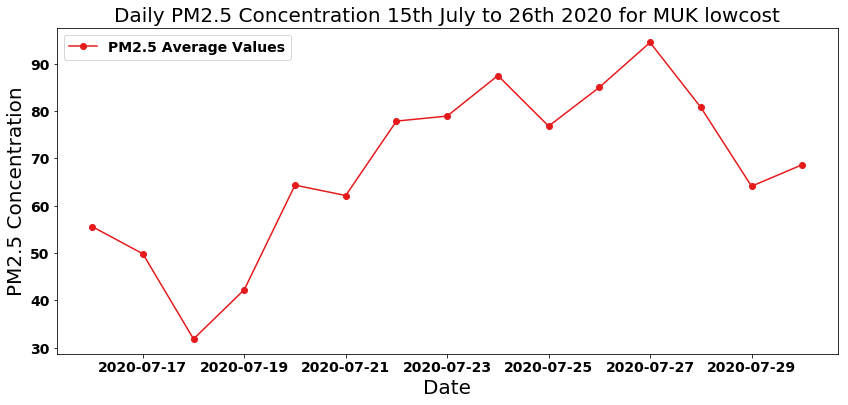

In [198]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(muk_lowcost_daily_mean.index, 
             muk_lowcost_daily_mean['Average_PM2.5_CF_1_ug/m3'], marker='o', linestyle='solid', label='PM2.5 Average Values')
       
    chart_title =  'Daily PM2.5 Concentration 15th July to 26th 2020 for MUK lowcost'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join('daily_concentration_muk_lowcost.png'))

## MUK BAM

In [199]:
muk_bam_data.columns

Index(['Time', 'ConcRT(ug/m3)', 'ConcHR(ug/m3)', 'ConcS(ug/m3)', 'Flow(lpm)',
       'WS(m/s)', 'WD(Deg)', 'AT(C)', 'RH(%)', 'BP(mmHg)', 'FT(C)', 'FRH(%)',
       'Status'],
      dtype='object')

### Drop extra columns

In [200]:
#print(airquality_data_copy.columns)
muk_bam_data = muk_bam_data.drop(['Flow(lpm)', 'WS(m/s)', 'WD(Deg)', 'BP(mmHg)', 'FT(C)', 'FRH(%)', 'Status'], axis=1)

muk_bam_data.head()

,Time,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
0,2020-07-04 12:00:00,69705.9,28.4,33.1,27.7,47
1,2020-07-04 14:00:00,96000.6,18.0,21.0,27.6,47
2,2020-07-04 15:00:00,20.1,22.3,26.0,27.8,45
3,2020-07-04 16:00:00,24.6,26.8,31.2,26.8,44
4,2020-07-04 17:00:00,35.1,34.6,40.1,25.6,47


### Set timestamp as index

In [201]:
muk_bam_data["TimeStamp"] = pd.to_datetime(muk_bam_data["Time"])
muk_bam_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
muk_bam_data = muk_bam_data.set_index('TimeStamp')
muk_bam_data = muk_bam_data.drop(['Time'], axis=1)
muk_bam_data.tail()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
TimeStamp,,,,,
2020-08-26 05:00:00,18.2,20.4,23.0,18.0,93
2020-08-26 06:00:00,11.3,17.0,19.2,17.7,94
2020-08-26 07:00:00,32.7,37.0,41.6,17.4,95
2020-08-26 08:00:00,29.3,31.6,35.7,18.1,94
2020-08-26 09:00:00,34.1,33.9,38.6,21.6,84


### Filter out outliers

In [202]:
muk_bam_data = muk_bam_data[muk_bam_data['ConcHR(ug/m3)'] <= 500.4]
muk_bam_data = muk_bam_data[muk_bam_data['ConcHR(ug/m3)'] > 0]

### Get data from same date range for both devices - hourly

In [203]:
## get the lower boundary date 
muk_lowcost_hourly_mean.iloc[:1,:]
t= muk_lowcost_hourly_mean.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_lowcost_hourly_mean_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(muk_lowcost_hourly_mean_lower_date)

## get the upper boundary date 
t = muk_lowcost_hourly_mean.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_lowcost_hourly_mean_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(muk_lowcost_hourly_mean_upper_date)

2020-07-16 00:00:00
2020-07-30 23:00:00


In [204]:
## get the lower boundary date 
muk_bam_data.iloc[:1,:]
t= muk_bam_data.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_bam_data_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(muk_bam_data_lower_date)

## get the upper boundary date
t = muk_bam_data.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_bam_data_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(muk_bam_data_upper_date)

2020-07-04 12:00:00
2020-08-26 09:00:00


In [205]:
hourly_same_daterange = muk_bam_data[muk_lowcost_hourly_mean_lower_date:muk_lowcost_hourly_mean_upper_date]
hourly_same_daterange.head()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
TimeStamp,,,,,
2020-07-16 00:00:00,68.1,69.4,78.9,20.6,84
2020-07-16 01:00:00,54.4,52.7,59.8,20.5,82
2020-07-16 02:00:00,101.0,109.4,124.3,20.4,87
2020-07-16 03:00:00,75.8,74.0,84.0,20.1,89
2020-07-16 04:00:00,46.5,49.5,56.2,19.9,87


In [206]:
hourly_same_daterange.shape

(354, 5)

### Add time column for merging  BAM and Low cost data - hourly

In [207]:
muk_lowcost_hourly_mean  = muk_lowcost_hourly_mean.drop(
['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3', ], axis=1)
hourly_timestamp = muk_lowcost_hourly_mean.index.values
muk_lowcost_hourly_mean["Time"] = hourly_timestamp
muk_lowcost_hourly_mean["Time"] = pd.to_datetime(muk_lowcost_hourly_mean["Time"])
muk_lowcost_hourly_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-07-16 00:00:00,94.57,87.36,90.97,2020-07-16 00:00:00
2020-07-16 01:00:00,154.34,143.12,148.73,2020-07-16 01:00:00
2020-07-16 02:00:00,128.54,120.35,124.45,2020-07-16 02:00:00
2020-07-16 03:00:00,84.54,77.37,80.96,2020-07-16 03:00:00
2020-07-16 04:00:00,70.63,65.72,68.18,2020-07-16 04:00:00


In [208]:
hourly_BAM_data =  hourly_same_daterange
hourly_timestamp = hourly_BAM_data.index.values
hourly_BAM_data["Time"] = hourly_timestamp
hourly_BAM_data["Time"] = pd.to_datetime(hourly_BAM_data["Time"])

hourly_BAM_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%),Time
TimeStamp,,,,,,
2020-07-16 00:00:00,68.1,69.4,78.9,20.6,84,2020-07-16 00:00:00
2020-07-16 01:00:00,54.4,52.7,59.8,20.5,82,2020-07-16 01:00:00
2020-07-16 02:00:00,101.0,109.4,124.3,20.4,87,2020-07-16 02:00:00
2020-07-16 03:00:00,75.8,74.0,84.0,20.1,89,2020-07-16 03:00:00
2020-07-16 04:00:00,46.5,49.5,56.2,19.9,87,2020-07-16 04:00:00


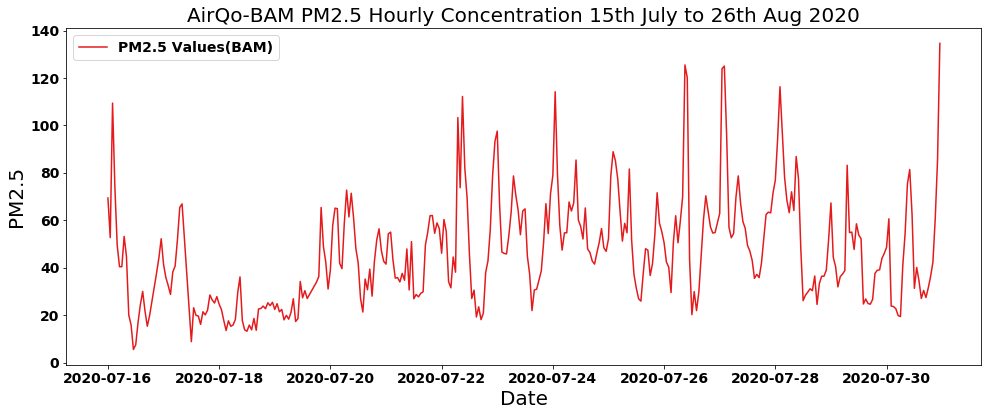

In [209]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(hourly_BAM_data.index, 
             hourly_BAM_data['ConcHR(ug/m3)'],  linestyle='solid', label='PM2.5 Values(BAM)')
    
    chart_title =  'AirQo-BAM PM2.5 Hourly Concentration 15th July to 26th Aug 2020'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('hourly_pm25_concentration_MUK_BAM')

### Combining BAM and lowcost datasets

In [210]:
hourly_combined_dataset= pd.merge(muk_lowcost_hourly_mean, hourly_BAM_data, on='Time')
hourly_combined_dataset.rename(columns={'Average_PM2.5_CF_1_ug/m3':'muk_lowcost_hourly_PM','ConcHR(ug/m3)':'muk_bam_hourly_PM'},inplace=True)

hourly_combined_dataset.to_csv('hourly_pm25_concentration_MUK_lowcost_vs_MUK_BAM.csv')
 
hourly_combined_dataset.head()



,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,muk_lowcost_hourly_PM,Time,ConcRT(ug/m3),muk_bam_hourly_PM,ConcS(ug/m3),AT(C),RH(%)
0,94.57,87.36,90.97,2020-07-16 00:00:00,68.1,69.4,78.9,20.6,84
1,154.34,143.12,148.73,2020-07-16 01:00:00,54.4,52.7,59.8,20.5,82
2,128.54,120.35,124.45,2020-07-16 02:00:00,101.0,109.4,124.3,20.4,87
3,84.54,77.37,80.96,2020-07-16 03:00:00,75.8,74.0,84.0,20.1,89
4,70.63,65.72,68.18,2020-07-16 04:00:00,46.5,49.5,56.2,19.9,87


### Accounting for time difference between the lowcost and BAM

In [211]:
hourly_combined_dataset['muk_bam_hourly_PM'] = hourly_combined_dataset['muk_bam_hourly_PM'].shift(-1)

### check the difference in values

In [212]:
hourly_combined_dataset['PM25_Difference'] = hourly_combined_dataset['muk_lowcost_hourly_PM'] - hourly_combined_dataset['muk_bam_hourly_PM']

### Visualise BAM vs lowcost data for MUK

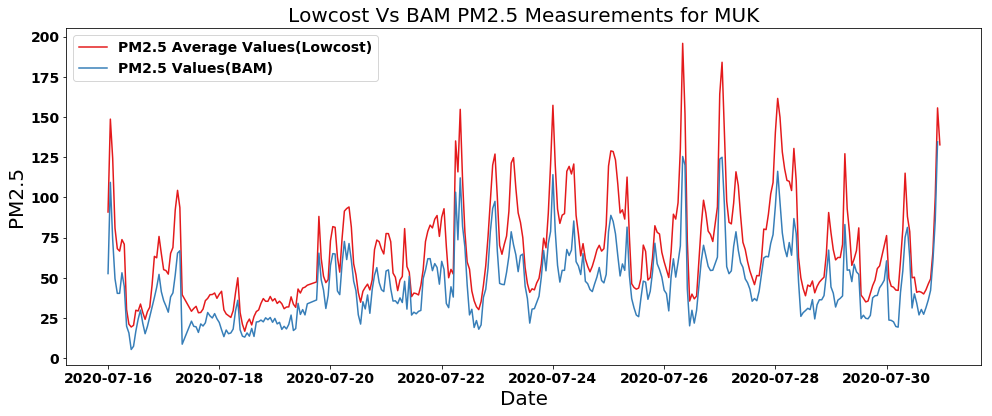

In [213]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(hourly_combined_dataset.Time, 
             hourly_combined_dataset['muk_lowcost_hourly_PM'], linestyle='solid', label='PM2.5 Average Values(Lowcost)') #marker='o', 
    plt.plot(hourly_combined_dataset.Time, 
             hourly_combined_dataset['muk_bam_hourly_PM'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',
    
    chart_title =  'Lowcost Vs BAM PM2.5 Measurements for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('hourly_pm25_concentration_comparison_MUK.png')

### Daily Comparisons

In [214]:
muk_bam_daily_std    = hourly_same_daterange.resample('D').std().round(2)
muk_bam_daily_mean   = hourly_same_daterange.resample('D').mean().round(2)

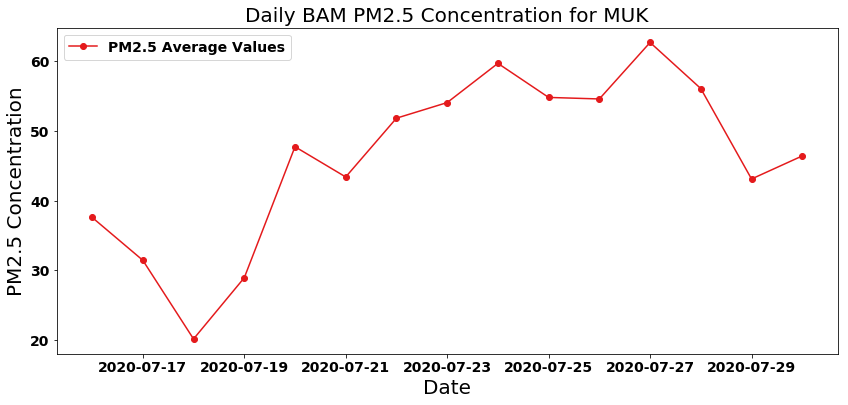

In [215]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(muk_bam_daily_mean.index, 
             muk_bam_daily_mean['ConcHR(ug/m3)'], marker='o', linestyle='solid', label='PM2.5 Average Values')
      
    chart_title =  'Daily BAM PM2.5 Concentration for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join('daily_pm25_concentration_BAM_.png'))

### Add time column for merging  BAM and Low cost data - daily

In [216]:
daily_lowcost_data = muk_lowcost_daily_mean
daily_lowcost_data  = daily_lowcost_data.drop(['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3'], axis=1)
daily_timestamp = daily_lowcost_data.index.values
daily_lowcost_data["Time"] = daily_timestamp
daily_lowcost_data["Time"] = pd.to_datetime(daily_lowcost_data["Time"])
daily_lowcost_data.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-07-16,57.56,53.56,55.56,2020-07-16
2020-07-17,51.40,48.22,49.81,2020-07-17
2020-07-18,33.12,30.51,31.81,2020-07-18
2020-07-19,43.27,41.18,42.22,2020-07-19
2020-07-20,66.59,62.03,64.31,2020-07-20


In [217]:
daily_bam_data = muk_bam_daily_mean
daily_timestamp = daily_bam_data.index.values
daily_bam_data["Time"] = daily_timestamp
daily_bam_data["Time"] = pd.to_datetime(daily_bam_data["Time"])
daily_bam_data.head()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%),Time
TimeStamp,,,,,,
2020-07-16,35.40,37.61,42.70,20.25,84.79,2020-07-16
2020-07-17,1458.43,31.45,35.69,20.58,79.19,2020-07-17
2020-07-18,18.42,20.15,22.93,21.09,64.62,2020-07-18
2020-07-19,5660.25,28.94,33.08,21.83,62.10,2020-07-19
2020-07-20,44.57,47.75,54.60,22.50,68.58,2020-07-20


In [218]:
daily_combined_dataset= pd.merge(daily_lowcost_data, daily_bam_data, on='Time')

daily_combined_dataset.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'muk_lowcost_daily_PM','ConcHR(ug/m3)':'muk_bam_daily_PM'},inplace=True)

daily_combined_dataset.to_csv('Daily_pm25_concentration_airqo_vs_BAM_MUK.csv')
 
daily_combined_dataset.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,muk_lowcost_daily_PM,Time,ConcRT(ug/m3),muk_bam_daily_PM,ConcS(ug/m3),AT(C),RH(%)
0,57.56,53.56,55.56,2020-07-16,35.40,37.61,42.70,20.25,84.79
1,51.40,48.22,49.81,2020-07-17,1458.43,31.45,35.69,20.58,79.19
2,33.12,30.51,31.81,2020-07-18,18.42,20.15,22.93,21.09,64.62
3,43.27,41.18,42.22,2020-07-19,5660.25,28.94,33.08,21.83,62.10
4,66.59,62.03,64.31,2020-07-20,44.57,47.75,54.60,22.50,68.58


In [219]:
daily_combined_dataset['PM25_difference'] = daily_combined_dataset['muk_lowcost_daily_PM'] - daily_combined_dataset['muk_bam_daily_PM']
daily_combined_dataset['PM25_difference'].head(10)

0    17.95
1    18.36
2    11.66
3    13.28
4    16.56
5    18.71
6    25.99
7    24.81
8    27.74
9    21.94
Name: PM25_difference, dtype: float64

In [220]:
daily_combined_dataset['muk_lowcost_daily_PM'].head(10)

0    55.56
1    49.81
2    31.81
3    42.22
4    64.31
5    62.12
6    77.84
7    78.90
8    87.46
9    76.77
Name: muk_lowcost_daily_PM, dtype: float64

In [221]:
daily_combined_dataset['muk_bam_daily_PM'].head(10)

0    37.61
1    31.45
2    20.15
3    28.94
4    47.75
5    43.41
6    51.85
7    54.09
8    59.72
9    54.83
Name: muk_bam_daily_PM, dtype: float64

### Visualising daily concetration MUK BAM vs Low cost

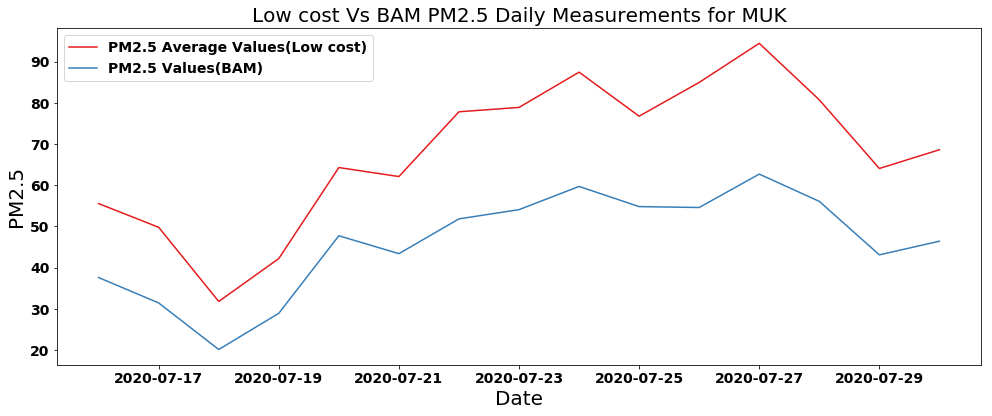

In [222]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(daily_combined_dataset.Time, 
             daily_combined_dataset['muk_lowcost_daily_PM'], linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
    plt.plot(daily_combined_dataset.Time, 
             daily_combined_dataset['muk_bam_daily_PM'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',
    
    chart_title =  'Low cost Vs BAM PM2.5 Daily Measurements for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('daily_pm25_concentration_comparison.png')

# Linear Regression model - Scikit-Learn - Hourly

In [223]:
# take only rows where hourly_PM is not null
hourly_combined_dataset = hourly_combined_dataset[hourly_combined_dataset['muk_lowcost_hourly_PM'].notna()]
hourly_combined_dataset = hourly_combined_dataset[hourly_combined_dataset['muk_bam_hourly_PM'].notna()]

In [224]:
X_muk = hourly_combined_dataset['muk_lowcost_hourly_PM'].values
X_muk = X_muk.reshape((-1, 1))
y_muk = hourly_combined_dataset['muk_bam_hourly_PM'].values

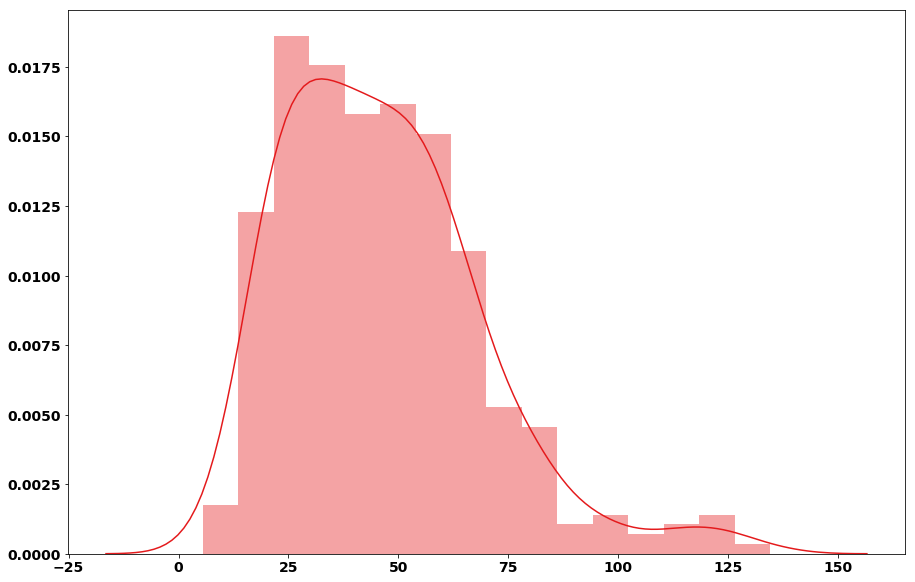

In [225]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_muk)

In [226]:
X_train_muk, X_test_muk, y_train_muk, y_test_muk = train_test_split(X_muk, y_muk, test_size=0.2, random_state=0)

In [227]:
regressor_muk = LinearRegression()  
regressor_muk.fit(X_train_muk, y_train_muk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
#To retrieve the intercept:
print(regressor_muk.intercept_)
#For retrieving the slope:
print(regressor_muk.coef_)

0.46942609517749645
[0.68658871]


### How to get the calibrated value from the raw value,using the equation
### What are we comparing is it raw vs calibrated or BAM vs Calibrated

In [229]:
y_pred_muk = regressor_muk.predict(X_test_muk)

In [230]:
df_muk = pd.DataFrame({'Actual': y_test_muk.flatten(), 'Predicted': y_pred_muk.flatten()})
df_muk

,Actual,Predicted
0,53.2,51.160271
1,34.1,48.262866
2,24.5,28.427318
3,54.7,59.907411
4,57.8,50.679659
5,47.4,46.127575
6,54.3,53.748710
7,13.6,18.341330
8,21.4,20.050936
9,26.1,34.853789


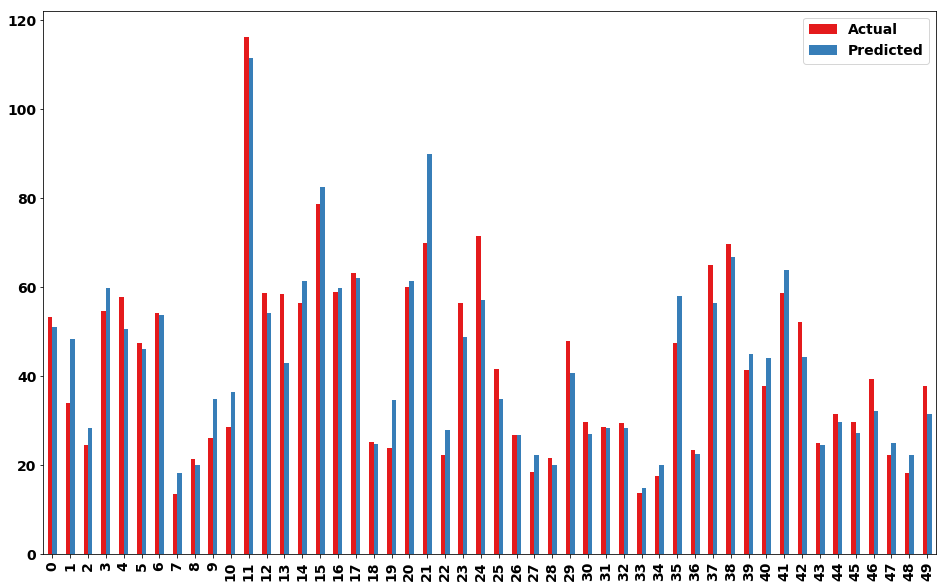

In [231]:
df1 = df_muk.head(50)
df1.plot(kind='bar',figsize=(16,10)) 
title =  'Hourly Actual Vs Predicted PM2.5 Values for MUK 15th Jul - 26th Aug 2020'
plt.show()

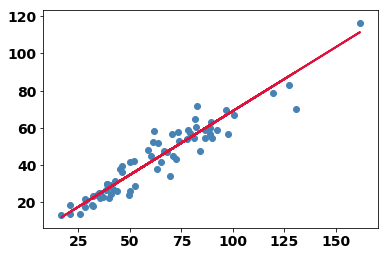

In [232]:
plt.plot(X_test_muk, y_pred_muk, color='crimson', linewidth=2)
plt.scatter(X_test_muk, y_test_muk,  color='steelblue')
title =  'Hourly Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.show()

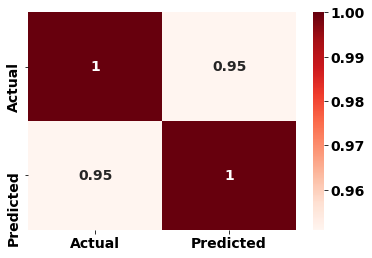

In [233]:
actual_predicted_correlations = df_muk.corr()
correlations = df_muk['Actual'].corr(df_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [234]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_muk, y_pred_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_muk, y_pred_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_muk, y_pred_muk)))

Mean Absolute Error: 4.699381737323203
Mean Squared Error: 37.89390898989173
Root Mean Squared Error: 6.155802871266406


# # Linear Regression model - Scikit-Learn - Daily# 

In [235]:
# take only rows where hourly_PM is not null
daily_combined_dataset = daily_combined_dataset[ daily_combined_dataset['muk_lowcost_daily_PM'].notna()]
daily_combined_dataset = daily_combined_dataset[daily_combined_dataset['muk_bam_daily_PM'].notna()]
daily_combined_dataset['muk_bam_daily_PM'].shape

(15,)

In [236]:
X_daily = daily_combined_dataset['muk_lowcost_daily_PM'].values
X_daily = X_daily.reshape((-1, 1))
y_daily = daily_combined_dataset['muk_bam_daily_PM'].values
X_daily.shape[0]
y_daily.shape[0]

15

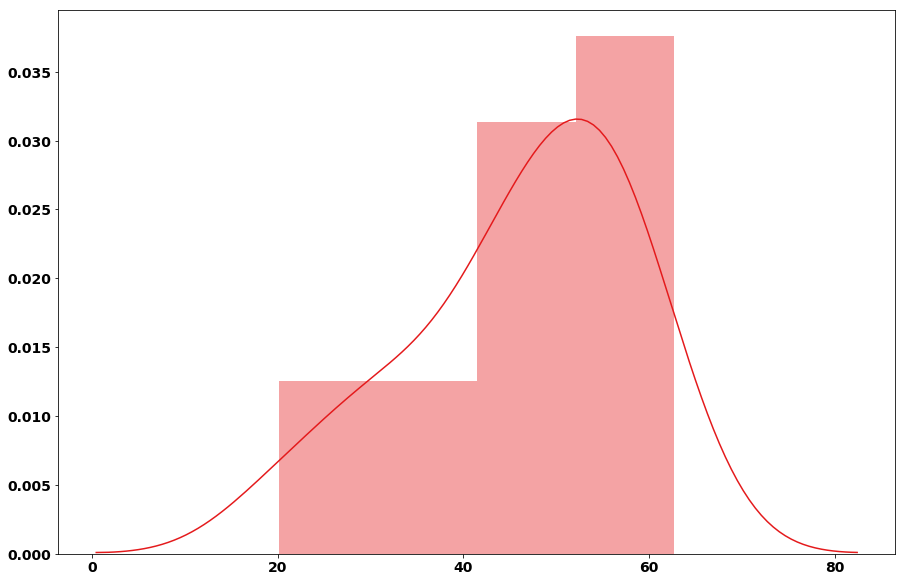

In [237]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_daily)

In [238]:
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=0)

In [239]:
regressor_daily = LinearRegression()  
regressor_daily.fit(X_train_daily, y_train_daily) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
#To retrieve the intercept:
print(regressor_daily.intercept_)
#For retrieving the slope:
print(regressor_daily.coef_)

0.5699061491593298
[0.67480502]


In [241]:
y_pred_daily = regressor_daily.predict(X_test_daily)

In [242]:
df_daily = pd.DataFrame({'Actual': y_test_daily.flatten(), 'Predicted': y_pred_daily.flatten()})
df_daily

,Actual,Predicted
0,31.45,34.181944
1,51.85,53.096729
2,59.72,59.588353


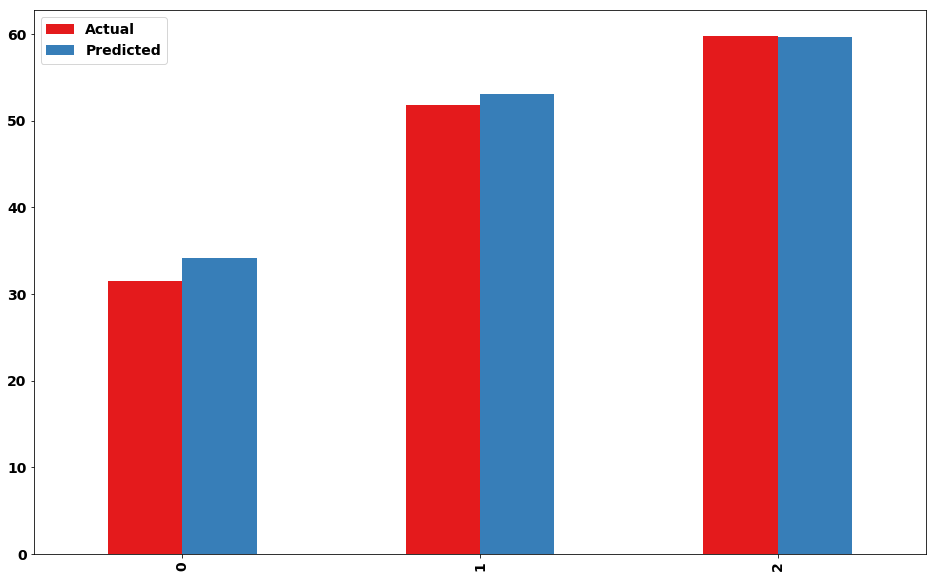

In [243]:
df1_daily = df_daily
df1_daily.plot(kind='bar',figsize=(16,10)) 
plt.show()

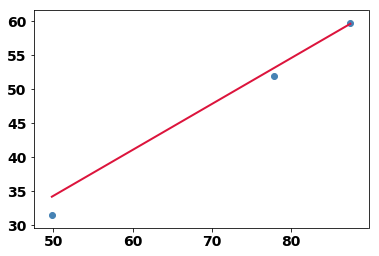

In [244]:
plt.plot(X_test_daily, y_pred_daily, color='crimson', linewidth=2)
plt.scatter(X_test_daily, y_test_daily,  color='steelblue')
plt.show()

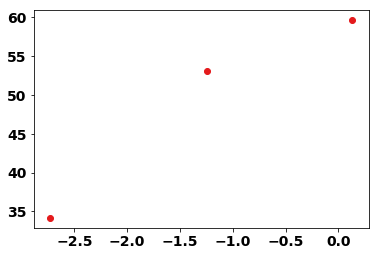

In [245]:
residuals = y_test_daily-y_pred_daily
plt.scatter(residuals,y_pred_daily)
plt.show()

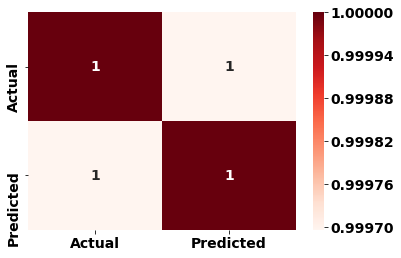

In [246]:
actual_predicted_correlations =df_daily.corr()
correlations = df_daily['Actual'].corr(df_daily['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [247]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_daily, y_pred_daily))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_daily, y_pred_daily))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_daily, y_pred_daily)))

Mean Absolute Error: 1.370106622978638
Mean Squared Error: 3.0117275188935184
Root Mean Squared Error: 1.7354329485444024


### saving and loading models

In [248]:
joblib.dump(regressor_muk, 'regressor_muk.pkl') 
regressor_loaded = joblib.load('regressor_muk.pkl')

In [249]:
joblib.dump(regressor_muk, 'regressor_daily.pkl') 
regressor_loaded = joblib.load('regressor_daily.pkl')

### Multiple linear regression

In [250]:
X_MLRx = hourly_combined_dataset[['muk_lowcost_hourly_PM','AT(C)','RH(%)']]
X_MLR_muk = hourly_combined_dataset[['muk_lowcost_hourly_PM','AT(C)','RH(%)']].values
# X_MLR_muk = X_MLR_muk.reshape((-1, 1))
y_MLR_muk = hourly_combined_dataset['muk_bam_hourly_PM'].values                              
hourly_combined_dataset['muk_lowcost_hourly_PM'].shape

(353,)

In [251]:
X_train_MLR_muk, X_test_MLR_muk, y_train_MLR_muk, y_test_MLR_muk = train_test_split(X_MLR_muk, y_MLR_muk, test_size=0.2, random_state=0)

In [252]:
regressor_MLR_muk = LinearRegression()  
regressor_MLR_muk.fit(X_train_MLR_muk, y_train_MLR_muk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [253]:
# print('Intercept: \n', regressor_MLR_muk.intercept_)
# print('Coefficients: \n', regressor_MLR_muk.coef_)

In [254]:
intercept_df_muk = pd.DataFrame(regressor_MLR_muk.intercept_, X_MLRx.columns, columns=['Intercept'])  
intercept_df_muk

,Intercept
muk_lowcost_hourly_PM,0.472462
AT(C),0.472462
RH(%),0.472462


In [255]:
coeff_df_muk = pd.DataFrame(regressor_MLR_muk.coef_, X_MLRx.columns, columns=['Coefficient'])  
coeff_df_muk

,Coefficient
muk_lowcost_hourly_PM,0.727859
AT(C),0.433313
RH(%),-0.164657


In [256]:
y_pred_mlr_muk = regressor_MLR_muk.predict(X_test_MLR_muk)

In [257]:
df_mlr_muk = pd.DataFrame({'Actual': y_test_MLR_muk, 'Predicted': y_pred_mlr_muk})

In [258]:
y_pred_mlr_muk

array([ 48.12681404,  44.89059032,  32.14760311,  57.02709885,
        51.30909813,  52.00376073,  51.83279066,  19.15879797,
        21.0058426 ,  32.27007419,  31.74710291, 114.20358935,
        54.12058408,  42.30884405,  60.11481077,  81.87252522,
        58.98670422,  63.07441016,  24.7631355 ,  31.84338803,
        61.40364266,  88.48685715,  26.07198854,  49.14804778,
        57.77349358,  37.25970065,  25.68875582,  22.96372627,
        19.5641429 ,  42.61350396,  31.74049328,  30.21714128,
        27.66476198,  16.08937711,  17.88566912,  55.64839977,
        25.73168332,  56.79153458,  66.40810806,  43.00495157,
        40.95988458,  61.37867782,  48.32507528,  29.48973555,
        33.67197886,  28.95967466,  36.48258356,  25.16730543,
        20.61481924,  35.1636631 ,  57.83414179,  86.10327883,
        35.64403303,  49.21143526,  45.91653195,  26.0726021 ,
        30.43959362,  59.78052461,  66.45097709,  32.67871365,
        17.00422059,  39.78243311,  55.8029428 ,  14.33

In [259]:
# plt.figure(figsize=(10,6))
# plt.plot(X_test_MLR_muk[:,0], y_pred_mlr_muk, color='crimson', linewidth=2)
# plt.scatter(X_test_MLR_muk[:,0], y_test_MLR_muk,  color='steelblue')
# title = 'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
# plt.title(title,fontsize=20)
# plt.show()


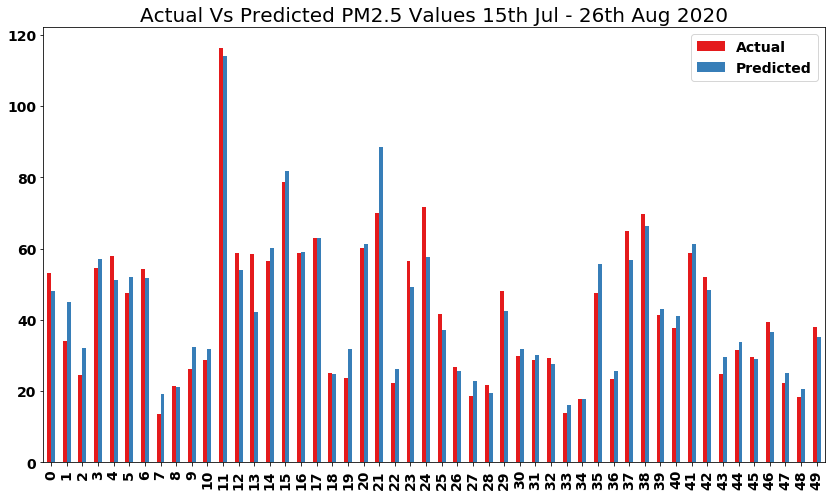

In [260]:
df1_mlr_muk  = df_mlr_muk .head(50)
# df1.plot(kind='bar',figsize=(14,6))
ax = df1_mlr_muk.plot.bar(figsize=(14,8))
title =  'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.title(title,fontsize=20)
plt.show()

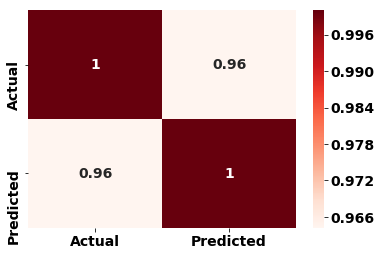

In [261]:
actual_predicted_correlationsx =df_mlr_muk.corr()
correlations_x= df_mlr_muk['Actual'].corr(df_mlr_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlationsx, annot=True, cmap=plt.cm.Reds)
plt.show()

In [262]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk)))

Mean Absolute Error: 3.986440079855045
Mean Squared Error: 28.204459406080595
Root Mean Squared Error: 5.3107870797162064


### Multiple linear regression - Daily, MUK

In [263]:
X_MLRx_daily = daily_combined_dataset[['muk_lowcost_daily_PM','AT(C)','RH(%)']]
X_MLR_daily = daily_combined_dataset[['muk_lowcost_daily_PM','AT(C)','RH(%)']].values
# X_MLR_daily = X_MLR_daily.reshape((-1, 1))
y_MLR_daily = daily_combined_dataset['muk_bam_daily_PM'].values
daily_combined_dataset['muk_lowcost_daily_PM'].shape

(15,)

In [264]:
X_train_MLR_daily, X_test_MLR_daily, y_train_MLR_daily, y_test_MLR_daily = train_test_split(X_MLR_daily, y_MLR_daily, test_size=0.2, random_state=0)

In [265]:
regressor_MLR_daily = LinearRegression()  
regressor_MLR_daily.fit(X_train_MLR_daily, y_train_MLR_daily)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [266]:
intercept_df_daily = pd.DataFrame(regressor_MLR_daily.intercept_, X_MLRx_daily.columns, columns=['Intercept'])  
intercept_df_daily

,Intercept
muk_lowcost_daily_PM,-43.231431
AT(C),-43.231431
RH(%),-43.231431


In [267]:
coeff_df_daily = pd.DataFrame(regressor_MLR_daily.coef_, X_MLRx_daily.columns, columns=['Coefficient'])  
coeff_df_daily

,Coefficient
muk_lowcost_daily_PM,0.625311
AT(C),1.710495
RH(%),0.132183


In [268]:
y_pred_mlr_daily = regressor_MLR_daily.predict(X_test_MLR_daily)

In [269]:
df_mlr_daily = pd.DataFrame({'Actual': y_test_MLR_daily, 'Predicted': y_pred_mlr_daily})

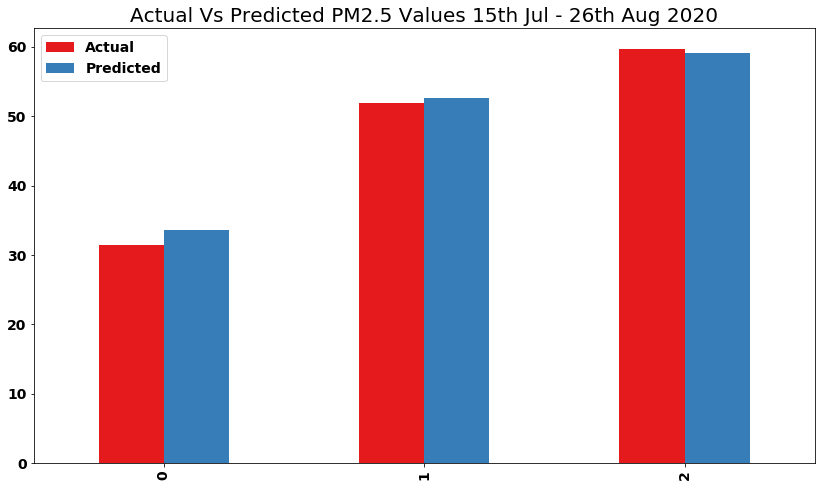

In [270]:
df1_mlr_daily  = df_mlr_daily.head(50)
# df1.plot(kind='bar',figsize=(14,6))
ax = df1_mlr_daily.plot.bar(figsize=(14,8))
title =  'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.title(title,fontsize=20)
plt.show()

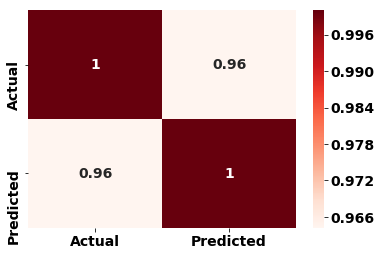

In [271]:
actual_predicted_correlationsx =df_mlr_muk.corr()
correlations_x= df_mlr_muk['Actual'].corr(df_mlr_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlationsx, annot=True, cmap=plt.cm.Reds)
plt.show()

In [272]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk)))

Mean Absolute Error: 3.986440079855045
Mean Squared Error: 28.204459406080595
Root Mean Squared Error: 5.3107870797162064


### Uncertainity - hourly

In [273]:
x = hourly_combined_dataset['muk_lowcost_hourly_PM'].values
y = hourly_combined_dataset['muk_bam_hourly_PM'].values
x.shape

(353,)

In [274]:
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

In [275]:
# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

Optimal Values
a: 0.6819842471437706
b: 0.7001026316567802


In [276]:
# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

R^2: 0.9188903292090936
Uncertainty
a: 0.682+/-0.011
b: 0.7+/-0.8


In [277]:
popt

array([0.68198425, 0.70010263])

In [278]:
pcov

array([[ 1.16963582e-04, -7.83615095e-03],
       [-7.83615095e-03,  6.43296690e-01]])

In [279]:
#a * x + b
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

Uncertainty
a: 0.682+/-0.011
b: 0.7+/-0.8


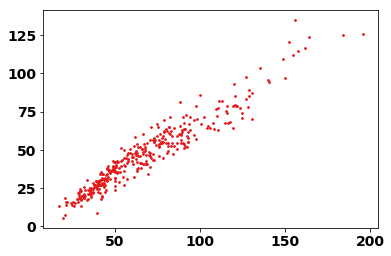

In [280]:
# plot data
plt.scatter(x, y, s=3, label='Data')

In [281]:
# calculate regression confidence interval
px = np.linspace(0, 200, 300)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

In [282]:
def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    print(yp)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb, yp

lpb, upb, yp = predband(px, x, y, popt, f, conf=0.95)

[  0.70010263   1.15627939   1.61245614   2.06863289   2.52480965
   2.9809864    3.43716316   3.89333991   4.34951666   4.80569342
   5.26187017   5.71804693   6.17422368   6.63040043   7.08657719
   7.54275394   7.99893069   8.45510745   8.9112842    9.36746096
   9.82363771  10.27981446  10.73599122  11.19216797  11.64834473
  12.10452148  12.56069823  13.01687499  13.47305174  13.9292285
  14.38540525  14.841582    15.29775876  15.75393551  16.21011227
  16.66628902  17.12246577  17.57864253  18.03481928  18.49099604
  18.94717279  19.40334954  19.8595263   20.31570305  20.77187981
  21.22805656  21.68423331  22.14041007  22.59658682  23.05276357
  23.50894033  23.96511708  24.42129384  24.87747059  25.33364734
  25.7898241   26.24600085  26.70217761  27.15835436  27.61453111
  28.07070787  28.52688462  28.98306138  29.43923813  29.89541488
  30.35159164  30.80776839  31.26394515  31.7201219   32.17629865
  32.63247541  33.08865216  33.54482892  34.00100567  34.45718242
  34.913359

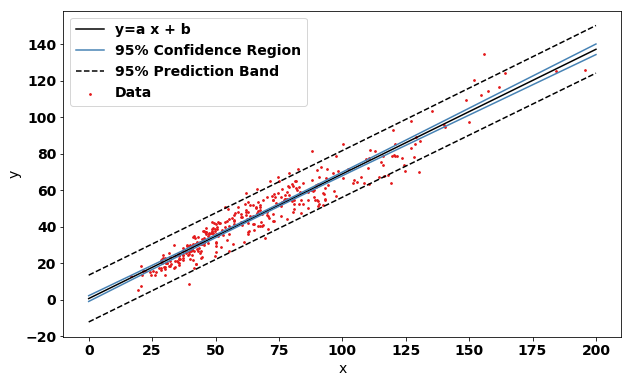

In [283]:
# plot data
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=3, label='Data')
# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='steelblue',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='steelblue')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# save and show figure
plt.savefig('regression.png')
plt.show()

## US embassy low cost device


### Setting index as timestamp

In [284]:
us_embassy_lowcost_data["TimeStamp"] = pd.to_datetime(us_embassy_lowcost_data["created_at"])
us_embassy_lowcost_data["TimeStamp"] = us_embassy_lowcost_data["TimeStamp"]+ datetime.timedelta(hours=3)
us_embassy_lowcost_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
us_embassy_lowcost_data = us_embassy_lowcost_data.set_index('TimeStamp')
us_embassy_lowcost_data = us_embassy_lowcost_data.drop(['created_at'], axis=1)
us_embassy_lowcost_data.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-07-25 09:19:34,81.08,86.48,75.75,83.35,78.41,84.92
2019-07-25 09:20:57,75.27,81.23,69.52,78.08,72.40,79.66
2019-07-25 09:27:07,70.85,77.80,68.28,79.55,69.56,78.68
2019-07-25 09:28:28,67.98,74.47,68.68,78.13,68.33,76.30
2019-07-25 09:29:58,68.93,76.75,64.97,76.67,66.95,76.71


### Filtering outliers

In [285]:
us_embassy_lowcost_data = us_embassy_lowcost_data[us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] <= 500.4]
us_embassy_lowcost_data = us_embassy_lowcost_data[us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] > 0]

### Get data range

In [286]:
us_embassy_lowcost_data = us_embassy_lowcost_data.loc['2020-02-01':'2020-02-15']

### Hourly concetrations for the US embassy low cost sensors

In [287]:
us_embassy_lowcost_hourly_std  = us_embassy_lowcost_data.resample('H').std().round(2)
us_embassy_lowcost_hourly_mean = us_embassy_lowcost_data.resample('H').mean().round(2)

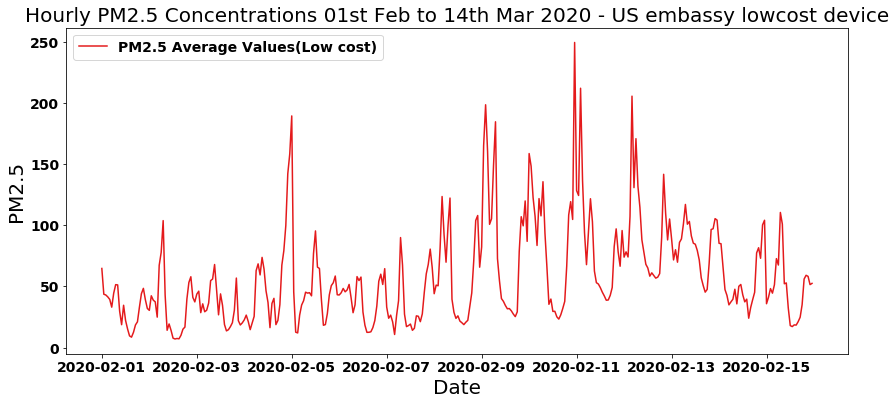

<Figure size 432x288 with 0 Axes>

In [288]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(us_embassy_lowcost_hourly_mean.index, 
        us_embassy_lowcost_hourly_mean['Average_PM2.5_CF_1_ug/m3'],linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 

chart_title =  'Hourly PM2.5 Concentrations 01st Feb to 14th Mar 2020 - US embassy lowcost device'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('hourly_lowcost_us_embassy.png')

### Daily concetrations - US embassy lowcost device

In [289]:
us_embassy_lowcost_daily_std    = us_embassy_lowcost_data.resample('D').std().round(2)
us_embassy_lowcost_daily_mean   = us_embassy_lowcost_data.resample('D').mean().round(2)

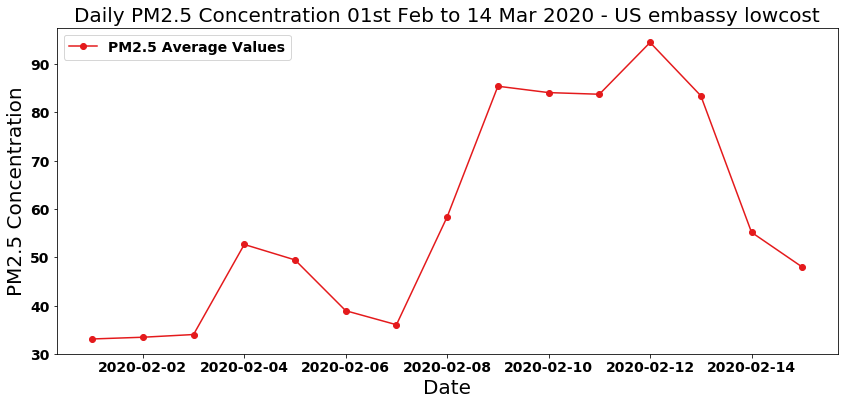

In [290]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(us_embassy_lowcost_daily_mean.index, 
         us_embassy_lowcost_daily_mean['Average_PM2.5_CF_1_ug/m3'], marker='o', linestyle='solid', label='PM2.5 Average Values')

chart_title =  'Daily PM2.5 Concentration 01st Feb to 14 Mar 2020 - US embassy lowcost'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5 Concentration', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
fig.savefig(os.path.join('daily_lowcost_us_embassy.png'))

## US embassy BAM 

In [291]:
us_embassy_bam_data.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

In [292]:
#print(airquality_data_copy.columns)
us_embassy_bam_data = us_embassy_bam_data.drop(['Site','Parameter','Year','Month','Day','Hour','AQI','AQI Category','NowCast Conc.','Conc. Unit','Duration','QC Name'], axis=1)
us_embassy_bam_data.head()

,Date (LT),Raw Conc.
0,2017-01-01 01:00 AM,-999.0
1,2017-01-01 02:00 AM,-999.0
2,2017-01-01 03:00 AM,-999.0
3,2017-01-01 04:00 AM,-999.0
4,2017-01-01 05:00 AM,-999.0


###  Set Timestamp as index

In [293]:
us_embassy_bam_data["TimeStamp"] = pd.to_datetime(us_embassy_bam_data["Date (LT)"])
us_embassy_bam_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
us_embassy_bam_data = us_embassy_bam_data.set_index('TimeStamp')
us_embassy_bam_data = us_embassy_bam_data.drop(['Date (LT)'], axis=1)
us_embassy_bam_data.tail()

,Raw Conc.
TimeStamp,
2020-07-31 20:00:00,63.0
2020-07-31 21:00:00,81.0
2020-07-31 22:00:00,69.0
2020-07-31 23:00:00,93.0
2020-08-01 00:00:00,92.0


### Filter outliers

In [294]:
us_embassy_bam_data = us_embassy_bam_data[us_embassy_bam_data['Raw Conc.'] <= 500.4]
us_embassy_bam_data = us_embassy_bam_data[us_embassy_bam_data['Raw Conc.'] > 0]

### Getting upper and lower date boundaries

In [295]:
## get the lower boundary date from the daily airquality dataset
us_embassy_lowcost_hourly_mean.iloc[:1,:]
t= us_embassy_lowcost_hourly_mean.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_lowcost_hourly_mean_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(us_embassy_lowcost_hourly_mean_lower_date)

## get the upper boundary date from the daily airquality dataset
t = us_embassy_lowcost_hourly_mean.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_lowcost_hourly_mean_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(us_embassy_lowcost_hourly_mean_upper_date)

2020-02-01 00:00:00
2020-02-15 23:00:00


In [296]:
## get the lower boundary date from the daily airquality dataset
us_embassy_bam_data.iloc[:1,:]
t= us_embassy_bam_data.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_bam_data_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(us_embassy_bam_data_lower_date)

## get the upper boundary date from the daily airquality dataset
t = us_embassy_bam_data.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_bam_data_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(us_embassy_bam_data_upper_date)

2017-02-17 22:00:00
2020-08-01 00:00:00


In [337]:
hourly_same_range_us = us_embassy_bam_data[us_embassy_lowcost_hourly_mean_lower_date:us_embassy_lowcost_hourly_mean_upper_date]
hourly_same_range_us.tail()

,Raw Conc.,Time
TimeStamp,,
2020-02-15 19:00:00,51.0,2020-02-15 19:00:00
2020-02-15 20:00:00,73.0,2020-02-15 20:00:00
2020-02-15 21:00:00,73.0,2020-02-15 21:00:00
2020-02-15 22:00:00,79.0,2020-02-15 22:00:00
2020-02-15 23:00:00,72.0,2020-02-15 23:00:00


In [298]:
hourly_same_range_us.shape

(360, 1)

### Add Time column for merging the two datasets

In [299]:
us_embassy_lowcost_hourly_mean  = us_embassy_lowcost_hourly_mean.drop(
['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3',
       'Average_PM10_CF_1_ug/m3', ], axis=1)
hourly_timestamp = us_embassy_lowcost_hourly_mean.index.values
us_embassy_lowcost_hourly_mean["Time"] = hourly_timestamp
us_embassy_lowcost_hourly_mean["Time"] = pd.to_datetime(us_embassy_lowcost_hourly_mean["Time"])
us_embassy_lowcost_hourly_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-02-01 00:00:00,68.21,61.19,64.70,2020-02-01 00:00:00
2020-02-01 01:00:00,45.05,42.20,43.63,2020-02-01 01:00:00
2020-02-01 02:00:00,44.34,41.71,43.02,2020-02-01 02:00:00
2020-02-01 03:00:00,42.26,40.67,41.46,2020-02-01 03:00:00
2020-02-01 04:00:00,40.07,38.70,39.39,2020-02-01 04:00:00


In [300]:
hourly_timestamp = hourly_same_range_us.index.values
#print(len(hourly_timestamp))
hourly_same_range_us["Time"] = hourly_timestamp
#print(hourly_meteorology_data.columns)
hourly_same_range_us["Time"] = pd.to_datetime(hourly_same_range_us["Time"])

hourly_same_range_us.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Raw Conc.,Time
TimeStamp,,
2020-02-01 00:00:00,133.0,2020-02-01 00:00:00
2020-02-01 01:00:00,75.0,2020-02-01 01:00:00
2020-02-01 02:00:00,52.0,2020-02-01 02:00:00
2020-02-01 03:00:00,58.0,2020-02-01 03:00:00
2020-02-01 04:00:00,46.0,2020-02-01 04:00:00


In [301]:
hourly_combined_dataset_us_embassy = pd.merge(us_embassy_lowcost_hourly_mean, hourly_same_range_us, on='Time')
#hourly_combined_dataset = hourly_combined_dataset.dropna()
#hourly_combined_dataset= hourly_combined_dataset.set_index('TimeStamp')

hourly_combined_dataset_us_embassy.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'lowcost_PM2.5','Raw Conc.':'bam_PM2.5',
                                     },inplace=True)

hourly_combined_dataset_us_embassy.to_csv('hourly_US_embassy_lowcost.csv')
 
hourly_combined_dataset_us_embassy.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,lowcost_PM2.5,Time,bam_PM2.5
0,68.21,61.19,64.70,2020-02-01 00:00:00,133.0
1,45.05,42.20,43.63,2020-02-01 01:00:00,75.0
2,44.34,41.71,43.02,2020-02-01 02:00:00,52.0
3,42.26,40.67,41.46,2020-02-01 03:00:00,58.0
4,40.07,38.70,39.39,2020-02-01 04:00:00,46.0


In [302]:
# hourly_combined_dataset_us_embassy['bam_PM2.5'] = hourly_combined_dataset_us_embassy['bam_PM2.5'].shift(-1)

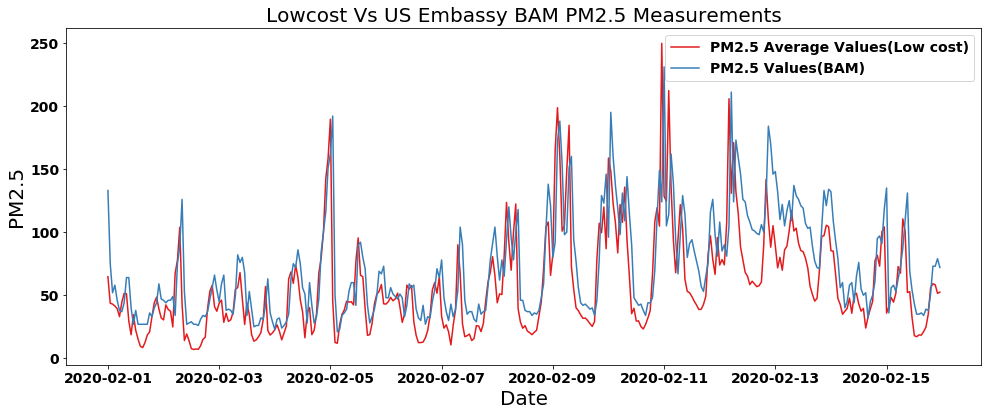

In [303]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(hourly_combined_dataset_us_embassy.Time, 
         hourly_combined_dataset_us_embassy['lowcost_PM2.5'],linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
plt.plot(hourly_combined_dataset_us_embassy.Time, 
         hourly_combined_dataset_us_embassy['bam_PM2.5'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',

chart_title =  'Lowcost Vs US Embassy BAM PM2.5 Measurements'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('hourly_US_lowcost')

### Daily concetrations - Us embassy

In [304]:
us_embassy_lowcost_daily_std    = us_embassy_lowcost_data.resample('D').std().round(2)
us_embassy_lowcost_daily_mean   = us_embassy_lowcost_data.resample('D').mean().round(2)

### Add Time column for merging the two datasets

In [305]:
us_embassy_lowcost_daily_mean  = us_embassy_lowcost_daily_mean.drop(
['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3', ], axis=1)
daily_timestamp = us_embassy_lowcost_daily_mean.index.values
us_embassy_lowcost_daily_mean["Time"] = daily_timestamp
us_embassy_lowcost_daily_mean["Time"] = pd.to_datetime(us_embassy_lowcost_daily_mean["Time"])

us_embassy_lowcost_daily_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-02-01,34.13,32.00,33.07,2020-02-01
2020-02-02,34.63,32.24,33.43,2020-02-02
2020-02-03,35.07,32.91,33.99,2020-02-03
2020-02-04,54.92,50.36,52.64,2020-02-04
2020-02-05,50.75,48.14,49.44,2020-02-05


In [306]:
daily_timestamp = us_embassy_bam_data.index.values
us_embassy_bam_data["Time"] = daily_timestamp
us_embassy_bam_data["Time"] = pd.to_datetime(us_embassy_bam_data["Time"])

us_embassy_bam_data.head()

,Raw Conc.,Time
TimeStamp,,
2017-02-17 22:00:00,60.0,2017-02-17 22:00:00
2017-02-17 23:00:00,62.0,2017-02-17 23:00:00
2017-02-18 00:00:00,64.0,2017-02-18 00:00:00
2017-02-18 01:00:00,43.0,2017-02-18 01:00:00
2017-02-18 02:00:00,49.0,2017-02-18 02:00:00


In [307]:
daily_combined_dataset_us= pd.merge(us_embassy_lowcost_daily_mean, us_embassy_bam_data, on='Time')
daily_combined_dataset_us.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'lowcost_daily_PM2.5','Raw Conc.':'bam_daily_PM2.5',
                                     },inplace=True)
daily_combined_dataset_us.to_csv('Daily_US_PMS.csv')
 
daily_combined_dataset_us.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,lowcost_daily_PM2.5,Time,bam_daily_PM2.5
0,34.13,32.00,33.07,2020-02-01,133.0
1,34.63,32.24,33.43,2020-02-02,46.0
2,35.07,32.91,33.99,2020-02-03,45.0
3,54.92,50.36,52.64,2020-02-04,23.0
4,50.75,48.14,49.44,2020-02-05,162.0


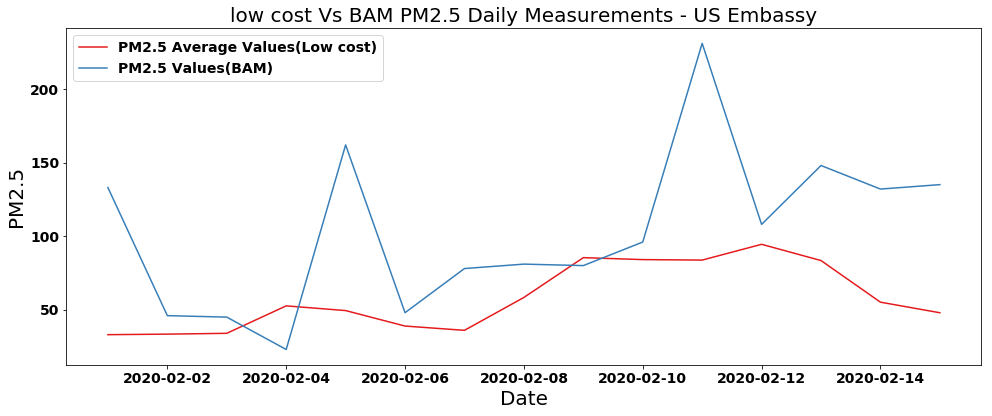

In [308]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(daily_combined_dataset_us.Time, 
         daily_combined_dataset_us['lowcost_daily_PM2.5'], linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
plt.plot(daily_combined_dataset_us.Time, 
         daily_combined_dataset_us['bam_daily_PM2.5'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',


chart_title =  'low cost Vs BAM PM2.5 Daily Measurements - US Embassy'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('daily_US_PMS.png')

## Linear Regression model - Scikit-Learn - Hourly

In [309]:
hourly_combined_dataset_us_embassy = hourly_combined_dataset_us_embassy[hourly_combined_dataset_us_embassy['lowcost_PM2.5'].notna()]
hourly_combined_dataset_us_embassy = hourly_combined_dataset_us_embassy[hourly_combined_dataset_us_embassy['bam_PM2.5'].notna()]
print(hourly_combined_dataset_us_embassy['lowcost_PM2.5'])

0       64.70
1       43.63
2       43.02
3       41.46
4       39.39
5       33.04
6       44.47
7       51.47
8       51.26
9       29.77
10      18.70
11      34.59
12      22.17
13      15.27
14       9.55
15       8.50
16      12.48
17      18.49
18      21.04
19      33.01
20      44.03
21      48.42
22      39.17
23      31.99
24      30.44
25      42.34
26      38.79
27      37.37
28      24.88
29      67.31
        ...  
330     45.21
331     77.42
332     81.66
333     73.04
334    100.34
335    104.15
336     35.86
337     41.12
338     48.23
339     44.51
340     51.38
341     72.75
342     67.52
343    110.54
344    100.98
345     52.19
346     52.85
347     32.33
348     17.94
349     17.15
350     18.53
351     18.39
352     21.19
353     24.80
354     35.10
355     56.02
356     59.12
357     58.24
358     51.49
359     52.50
Name: lowcost_PM2.5, Length: 360, dtype: float64


In [310]:
X_us_embassy = hourly_combined_dataset_us_embassy['lowcost_PM2.5'].values
X_us_embassy = X_us_embassy.reshape((-1, 1))
y_us_embassy = hourly_combined_dataset_us_embassy['bam_PM2.5'].values
print(X_us_embassy)
print(y_us_embassy)

[[133.]
 [ 75.]
 [ 52.]
 [ 58.]
 [ 46.]
 [ 38.]
 [ 37.]
 [ 44.]
 [ 64.]
 [ 64.]
 [ 40.]
 [ 27.]
 [ 38.]
 [ 27.]
 [ 27.]
 [ 27.]
 [ 27.]
 [ 27.]
 [ 36.]
 [ 33.]
 [ 40.]
 [ 44.]
 [ 59.]
 [ 47.]
 [ 46.]
 [ 44.]
 [ 46.]
 [ 46.]
 [ 49.]
 [ 34.]
 [ 75.]
 [ 89.]
 [126.]
 [ 53.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 27.]
 [ 27.]
 [ 26.]
 [ 31.]
 [ 34.]
 [ 33.]
 [ 37.]
 [ 47.]
 [ 56.]
 [ 66.]
 [ 54.]
 [ 45.]
 [ 59.]
 [ 66.]
 [ 38.]
 [ 39.]
 [ 38.]
 [ 35.]
 [ 50.]
 [ 82.]
 [ 76.]
 [ 80.]
 [ 68.]
 [ 34.]
 [ 53.]
 [ 39.]
 [ 25.]
 [ 26.]
 [ 26.]
 [ 32.]
 [ 31.]
 [ 42.]
 [ 63.]
 [ 36.]
 [ 29.]
 [ 23.]
 [ 31.]
 [ 32.]
 [ 24.]
 [ 26.]
 [ 29.]
 [ 35.]
 [ 63.]
 [ 75.]
 [ 72.]
 [ 86.]
 [ 75.]
 [ 56.]
 [ 51.]
 [ 28.]
 [ 60.]
 [ 42.]
 [ 28.]
 [ 33.]
 [ 47.]
 [ 84.]
 [100.]
 [116.]
 [151.]
 [162.]
 [192.]
 [ 50.]
 [ 21.]
 [ 23.]
 [ 34.]
 [ 36.]
 [ 39.]
 [ 53.]
 [ 60.]
 [ 60.]
 [ 42.]
 [ 90.]
 [ 92.]
 [ 80.]
 [ 71.]
 [ 42.]
 [ 28.]
 [ 33.]
 [ 39.]
 [ 49.]
 [ 69.]
 [ 67.]
 [ 73.]
 [ 48.]
 [ 48.]
 [ 56.]
 [ 51.]
 [ 49.]


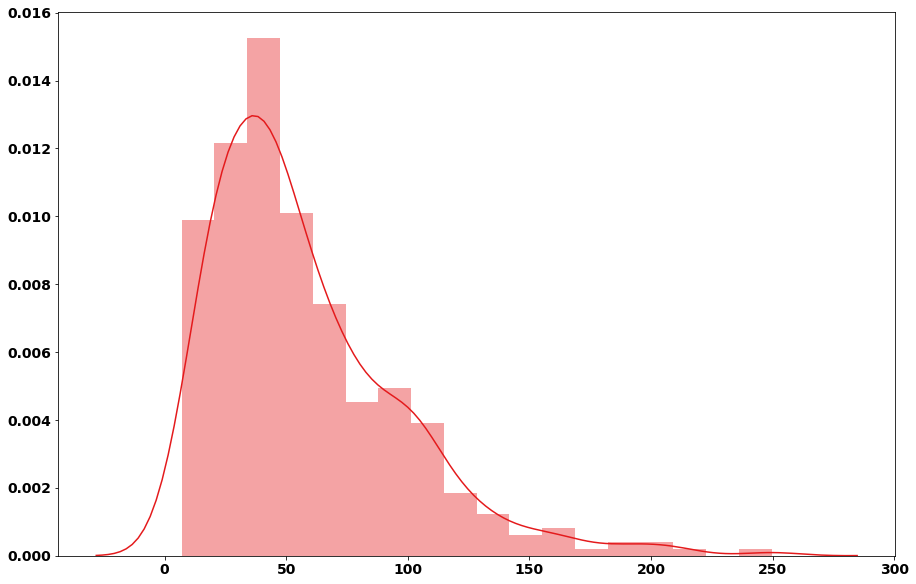

In [311]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_us_embassy)

In [312]:
X_train_us_embassy, X_test_us_embassy, y_train_us_embassy, y_test_us_embassy = train_test_split(X_us_embassy, y_us_embassy, test_size=0.2, random_state=0)

In [313]:
regressor_us_embassy = LinearRegression()  
regressor_us_embassy.fit(X_train_us_embassy, y_train_us_embassy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [314]:
#To retrieve the intercept:
print(regressor_us_embassy.intercept_)
#For retrieving the slope:
print(regressor_us_embassy.coef_)

4.358384814198011
[0.73935059]


In [315]:
y_pred_us_embassy = regressor_us_embassy.predict(X_test_us_embassy)

In [316]:
df_us_embassy = pd.DataFrame({'Actual': y_test_us_embassy.flatten(), 'Predicted': y_pred_us_embassy.flatten()})
df_us_embassy

,Actual,Predicted
0,44.47,31.714357
1,135.69,84.947600
2,42.31,48.719420
3,158.73,75.336042
4,35.07,28.756954
5,50.66,40.586564
6,26.78,29.496305
7,43.90,29.496305
8,7.01,24.320851
9,43.01,39.847213


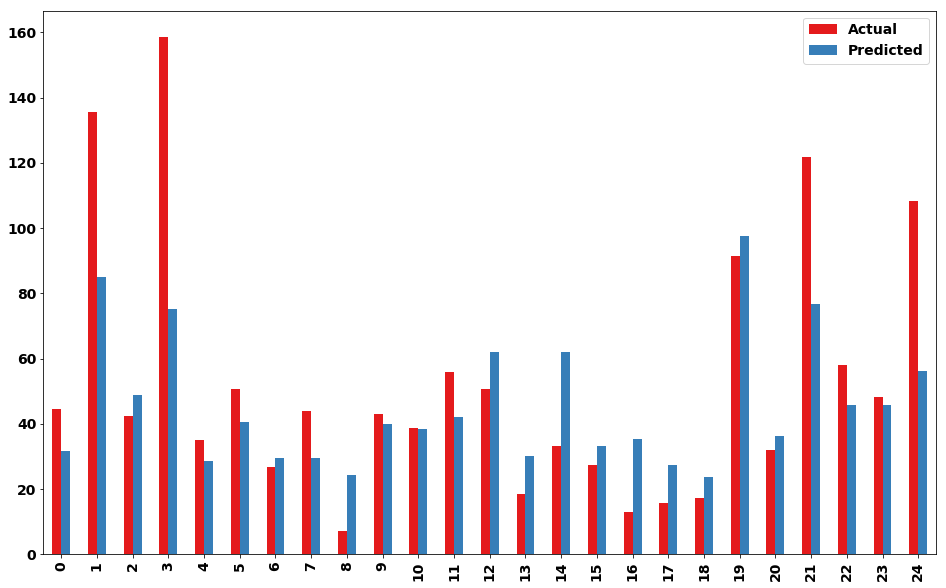

In [317]:
df1_us_embassy = df_us_embassy.head(25)
df1_us_embassy.plot(kind='bar',figsize=(16,10)) 
plt.show()

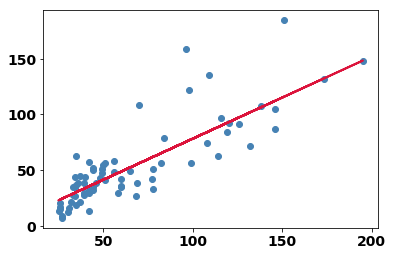

In [343]:
plt.scatter(X_test_us_embassy, y_test_us_embassy,  color='steelblue')
plt.plot(X_test_us_embassy, y_pred_us_embassy, color='crimson', linewidth=2)
plt.show()

In [344]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_us_embassy, y_pred_us_embassy))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_us_embassy, y_pred_us_embassy))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_us_embassy, y_pred_us_embassy)))

Mean Absolute Error: 14.022468355459388
Mean Squared Error: 425.8613879888653
Root Mean Squared Error: 20.636409280416622


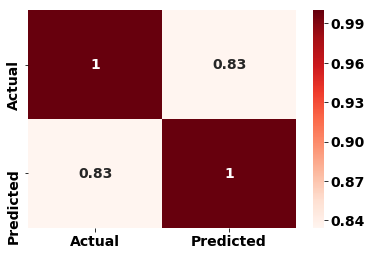

In [345]:
correlations_us_embassy =df_us_embassy.corr()
correlations_us = df_us_embassy['Actual'].corr(df_us_embassy['Predicted'])
all_features_corr = sns.heatmap(correlations_us_embassy, annot=True, cmap=plt.cm.Reds)
plt.show()

### Uncertainity - Hourly 

In [346]:
# xx = hourly_combined_dataset_us_embassy['bam_PM2.5'].values
# yy = hourly_combined_dataset_us_embassy['lowcost_PM2.5'].values
# xx.shape

In [347]:
# n = len(yy)

# def f(x, a, b):
#     return a * x + b

# popt, pcov = curve_fit(f, xx, yy)

In [348]:
# # retrieve parameter values
# a = popt[0]
# b = popt[1]
# print('Optimal Values')
# print('a: ' + str(a))
# print('b: ' + str(b))

In [349]:
# # compute r^2
# r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
# print('R^2: ' + str(r2))

# # calculate parameter confidence interval
# a,b = unc.correlated_values(popt, pcov)
# print('Uncertainty')
# print('a: ' + str(a))
# print('b: ' + str(b))

In [350]:
# # plot data
# plt.scatter(xx, yy, s=3, label='Data')

In [351]:
# # calculate regression confidence interval
# px = np.linspace(0, 250, 1000)
# py = a*px+b
# nom = unp.nominal_values(py)
# std = unp.std_devs(py)

In [352]:
# def predband(x, xd, yd, p, func, conf=0.95):
#     # x = requested points
#     # xd = x data
#     # yd = y data
#     # p = parameters
#     # func = function name
#     alpha = 1.0 - conf    # significance
#     N = xd.size          # data sample size
#     var_n = len(p)  # number of parameters
#     # Quantile of Student's t distribution for p=(1-alpha/2)
#     q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
#     # Stdev of an individual measurement
#     se = np.sqrt(1. / (N - var_n) * \
#                  np.sum((yd - func(xd, *p)) ** 2))
#     # Auxiliary definitions
#     sx = (x - xd.mean()) ** 2
#     sxd = np.sum((xd - xd.mean()) ** 2)
#     # Predicted values (best-fit model)
#     yp = func(x, *p)
#     # Prediction band
#     dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
#     # Upper & lower prediction bands.
#     lpb, upb = yp - dy, yp + dy
#     return lpb, upb

# lpb, upb = predband(px, x, y, popt, f, conf=0.95)

In [353]:
# # plot data
# plt.figure(figsize=(10,6))
# plt.scatter(xx, yy, s=3, label='Data')
# # plot the regression
# plt.plot(px, nom, c='black', label='y=a x + b')

# # uncertainty lines (95% confidence)
# plt.plot(px, nom - 1.96 * std, c='steelblue',\
#          label='95% Confidence Region')
# plt.plot(px, nom + 1.96 * std, c='steelblue')
# # prediction band (95% confidence)
# plt.plot(px, lpb, 'k--',label='95% Prediction Band')
# plt.plot(px, upb, 'k--')
# plt.ylabel('y')
# plt.xlabel('x')
# plt.legend(loc='best')

# # save and show figure
# plt.savefig('regression.png')
# plt.show()